In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('iris')

In [24]:
df.shape
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [9]:
X = df.drop('species',axis=1)
y = df['species']

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
scaler = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [33]:
knn = KNeighborsClassifier(n_neighbors=4)

In [34]:
knn.fit(x_train,y_train)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [38]:
pred = knn.predict(x_test)
print(accuracy_score(y_test,pred))

1.0


In [36]:
pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [37]:
print(knn.predict([[4.4,3.2,1.7,0.4]]))

['setosa']


C:\Users\Adnan Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [42]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error rate')

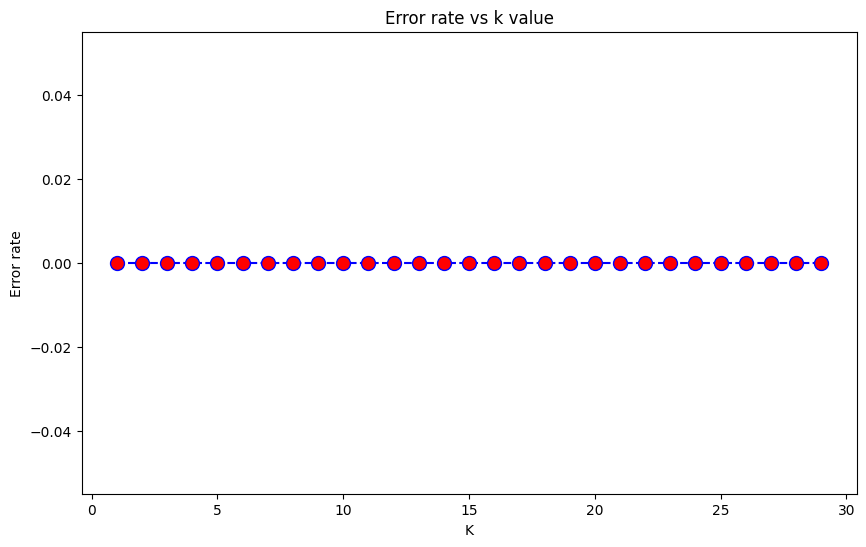

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs k value')
plt.xlabel('K')
plt.ylabel('Error rate')
